In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tools 
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats.stats as stats
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('track_features_final.csv', index_col=0)

In [4]:
df.head()

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950


In [5]:
meta = pd.read_csv('meta_final.csv', index_col = 0)

In [6]:
meta.rename(columns={'Track ID': 'track_id'}, inplace=True)

In [7]:

meta.head()

,track_id,length,zero_crossings,tempo,spec_cent_mean,spec_cent_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_mean0,chroma_var0,...,mfccs_mean15,mfccs_var15,mfccs_mean16,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19
0,2,660984,108342,161.0,0.365532,0.026789,6214.647549,2.281126e+06,0.734531,0.093535,...,1.253358,49.994880,-8.481487,53.345783,-2.040749,52.196274,-2.946624,51.77792,0.094077,40.441700
0,5,661560,66268,99.0,0.325568,0.032698,5437.441882,2.535670e+06,0.444994,0.075107,...,0.919858,66.263405,-4.126342,44.906055,-0.580666,44.026913,-1.600445,65.26340,1.350323,64.534930
0,10,660984,98404,112.0,0.310059,0.019171,4315.856035,6.900174e+05,0.280939,0.022039,...,-0.911099,42.735588,-3.207996,32.780640,3.043154,40.873420,-1.036512,30.22485,3.882601,29.444992
0,140,660984,29326,108.0,0.237486,0.032545,3863.175065,5.928252e+06,0.243959,0.082215,...,1.239001,43.232227,-5.205992,38.285038,-0.754437,39.603607,-6.319377,47.34824,-1.172379,44.371730
0,141,660984,40948,103.0,0.202888,0.019671,3315.637916,2.762245e+06,0.160931,0.059965,...,5.053833,99.240820,-0.170090,91.179344,3.087437,62.452350,-8.665928,70.66697,-1.098168,89.260025


In [8]:
df.shape[0]

3284

In [9]:
tracks = df.merge(meta, on='track_id', how='left')

In [10]:
df.dtypes

track_id              int64
title                object
artist               object
genre                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [11]:
meta.dtypes

track_id            int64
length              int64
zero_crossings      int64
tempo             float64
spec_cent_mean    float64
                   ...   
mfccs_var17       float64
mfccs_mean18      float64
mfccs_var18       float64
mfccs_mean19      float64
mfccs_var19       float64
Length: 76, dtype: object

In [12]:
tracks

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,...,mfccs_mean15,mfccs_var15,mfccs_mean16,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,...,1.253358,49.994880,-8.481487,53.345783,-2.040749,52.196274,-2.946624,51.777920,0.094077,40.441700
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,...,0.919858,66.263405,-4.126342,44.906055,-0.580666,44.026913,-1.600445,65.263400,1.350323,64.534930
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,...,-0.911099,42.735588,-3.207996,32.780640,3.043154,40.873420,-1.036512,30.224850,3.882601,29.444992
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,...,1.239001,43.232227,-5.205992,38.285038,-0.754437,39.603607,-6.319377,47.348240,-1.172379,44.371730
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,...,5.053833,99.240820,-0.170090,91.179344,3.087437,62.452350,-8.665928,70.666970,-1.098168,89.260025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,154306,Yummy,Fleslit,Hip-Hop,0.008100,0.707000,0.354000,0.903000,0.109000,0.040600,...,5.531777,60.408886,0.578954,34.085102,6.731422,32.125755,3.618689,43.405476,9.467090,79.778854
3280,154307,12:01 AM,Fleslit,Hip-Hop,0.059100,0.844000,0.346000,0.826000,0.054200,0.076500,...,-0.953383,97.223320,-5.637122,50.896816,6.983463,95.540886,2.458356,151.581600,2.188587,110.020600
3281,154308,Devil Of Miami,Fleslit,Hip-Hop,0.005560,0.574000,0.417000,0.768000,0.363000,0.044400,...,3.838140,90.520256,4.203661,88.265230,2.577975,108.629930,1.229812,69.142490,-3.231690,65.682460
3282,154309,A1 Symphony,Fleslit,Hip-Hop,0.411000,0.706000,0.654000,0.851000,0.053900,0.514000,...,-7.702279,40.592216,-10.535363,65.548470,1.828215,104.435350,7.517279,172.511520,8.652144,166.639270


In [13]:
tracks.columns

Index(['track_id', 'title', 'artist', 'genre', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo_x',
       'valence', 'length', 'zero_crossings', 'tempo_y', 'spec_cent_mean',
       'spec_cent_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
       'chroma_mean0', 'chroma_var0', 'chroma_mean1', 'chroma_var1',
       'chroma_mean2', 'chroma_var2', 'chroma_mean3', 'chroma_var3',
       'chroma_mean4', 'chroma_var4', 'chroma_mean5', 'chroma_var5',
       'chroma_mean6', 'chroma_var6', 'chroma_mean7', 'chroma_var7',
       'chroma_mean8', 'chroma_var8', 'chroma_mean9', 'chroma_var9',
       'chroma_mean10', 'chroma_var10', 'chroma_mean11', 'chroma_var11',
       'harm_mean', 'perc_mean', 'harm_var', 'perc_var', 'mfccs_mean0',
       'mfccs_var0', 'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2',
       'mfccs_mean3', 'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5',
       'mfccs_var5', 'mfccs_mean6', 'mfccs_var6',

In [14]:
tracks.isnull().sum()

track_id        0
title           0
artist          0
genre           0
acousticness    0
               ..
mfccs_var17     3
mfccs_mean18    3
mfccs_var18     3
mfccs_mean19    3
mfccs_var19     3
Length: 87, dtype: int64

In [15]:
tracks[tracks['mfccs_var19'].isnull()]

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,...,mfccs_mean15,mfccs_var15,mfccs_mean16,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19
2187,98565,Brandon Clark,Hi-Rez,Hip-Hop,0.101,0.798,0.954,0.0,0.1560,0.178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2188,98567,Fuck the World,Hi-Rez,Hip-Hop,0.183,0.644,0.869,0.0,0.0401,0.153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,98569,Love & Fear,Hi-Rez,Hip-Hop,0.451,0.707,0.544,0.0,0.2670,0.215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tracks.columns

Index(['track_id', 'title', 'artist', 'genre', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo_x',
       'valence', 'length', 'zero_crossings', 'tempo_y', 'spec_cent_mean',
       'spec_cent_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
       'chroma_mean0', 'chroma_var0', 'chroma_mean1', 'chroma_var1',
       'chroma_mean2', 'chroma_var2', 'chroma_mean3', 'chroma_var3',
       'chroma_mean4', 'chroma_var4', 'chroma_mean5', 'chroma_var5',
       'chroma_mean6', 'chroma_var6', 'chroma_mean7', 'chroma_var7',
       'chroma_mean8', 'chroma_var8', 'chroma_mean9', 'chroma_var9',
       'chroma_mean10', 'chroma_var10', 'chroma_mean11', 'chroma_var11',
       'harm_mean', 'perc_mean', 'harm_var', 'perc_var', 'mfccs_mean0',
       'mfccs_var0', 'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2',
       'mfccs_mean3', 'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5',
       'mfccs_var5', 'mfccs_mean6', 'mfccs_var6',

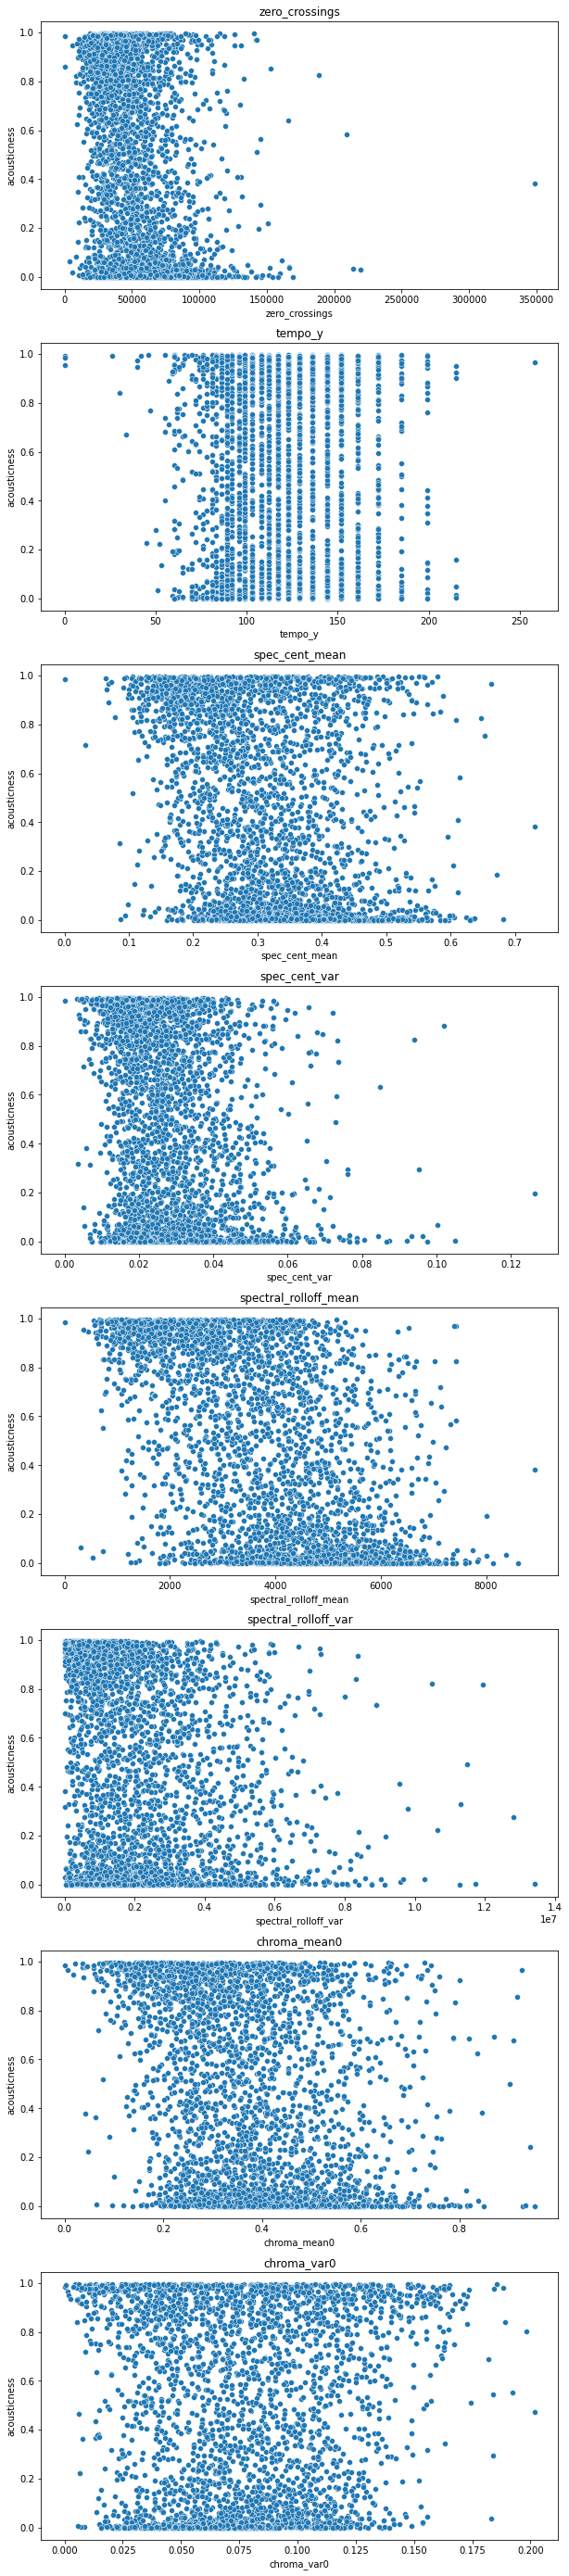

In [17]:
total = len(tracks.iloc[:, 13:21].columns)
fig, axes = plt.subplots(total, 1, figsize=(10, 50))

for i, col in enumerate(tracks.iloc[:, 13:21]):
    axes[i].set_title(col)
    sns.scatterplot(ax=axes[i], x=col, data=tracks, y='acousticness')

In [18]:
tracks.dropna(inplace=True)

In [19]:
cols = ['zero_crossings', 'tempo_y', 'spec_cent_mean',
       'spec_cent_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
       'chroma_mean0', 'chroma_var0', 'chroma_mean1', 'chroma_var1',
       'chroma_mean2', 'chroma_var2', 'chroma_mean3', 'chroma_var3',
       'chroma_mean4', 'chroma_var4', 'chroma_mean5', 'chroma_var5',
       'chroma_mean6', 'chroma_var6', 'chroma_mean7', 'chroma_var7',
       'chroma_mean8', 'chroma_var8', 'chroma_mean9', 'chroma_var9',
       'chroma_mean10', 'chroma_var10', 'chroma_mean11', 'chroma_var11',
       'harm_mean', 'perc_mean', 'harm_var', 'perc_var', 'mfccs_mean0',
       'mfccs_var0', 'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2',
       'mfccs_mean3', 'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5',
       'mfccs_var5', 'mfccs_mean6', 'mfccs_var6', 'mfccs_mean7', 'mfccs_var7',
       'mfccs_mean8', 'mfccs_var8', 'mfccs_mean9', 'mfccs_var9',
       'mfccs_mean10', 'mfccs_var10', 'mfccs_mean11', 'mfccs_var11',
       'mfccs_mean12', 'mfccs_var12', 'mfccs_mean13', 'mfccs_var13',
       'mfccs_mean14', 'mfccs_var14', 'mfccs_mean15', 'mfccs_var15',
       'mfccs_mean16', 'mfccs_var16', 'mfccs_mean17', 'mfccs_var17',
       'mfccs_mean18', 'mfccs_var18', 'mfccs_mean19', 'mfccs_var19']

# Acousticness

In [ ]:
# Model acousticness

In [20]:
X = tracks[cols]
y = tracks['acousticness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [22]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
pred_train = lreg.predict(X_train)

In [23]:
mean_squared_error(y_train, pred_train)**0.5

0.25483463992840777

In [24]:
lreg.score(X_train, y_train)

0.5556325356411382

In [25]:
lreg.score(X_test, y_test)

0.5210293591540183

In [26]:
from sklearn import linear_model

reg_l1 = linear_model.Lasso(alpha=0.1)
reg_l2 = linear_model.Ridge(alpha=.5)
reg_en = linear_model.ElasticNet(alpha=0.1)

l1_results = reg_l1.fit(X_train, y_train)
l2_results = reg_l2.fit(X_train, y_train)
en_results = reg_en.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.81197e-17): result may not be accurate.
  overwrite_a=True).T


In [27]:
l1_pred = l1_results.predict(X_train)
l2_pred = l2_results.predict(X_train)
en_pred = en_results.predict(X_train)

In [28]:
rmse = statsmodels.tools.eval_measures.rmse(y_train, l1_pred)

print(rmse)

0.26342137043086233


In [29]:
rmse = statsmodels.tools.eval_measures.rmse(y_train, l2_pred)

print(rmse)

0.2554610330713136


In [30]:
rmse = statsmodels.tools.eval_measures.rmse(y_train, en_pred)

print(rmse)

0.26238171272311467


In [31]:
l1_results.score(X_train, y_train)

0.525181819569692

In [32]:
l2_results.score(X_train, y_train)

0.5534453068678654

In [33]:
en_results.score(X_train, y_train)

0.5289223986080012

In [34]:
lr_pred = lreg.predict(X_test)

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

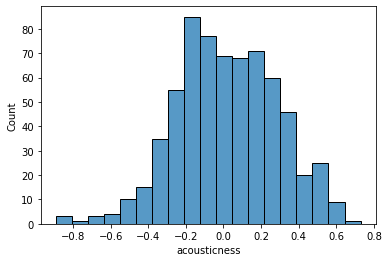

In [35]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='acousticness'>

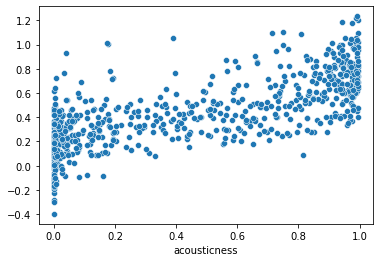

In [36]:
sns.scatterplot(x=y_test, y=lr_pred)

<AxesSubplot:xlabel='acousticness'>

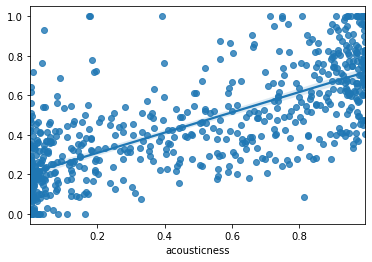

In [37]:
sns.regplot(x=y_test, y=np.clip(lr_pred,0,1))

In [38]:
import statsmodels.api as sm

In [39]:
X_train_con = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     43.07
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:02:55   Log-Likelihood:                -135.92
No. Observations:                2624   AIC:                             421.8
Df Residuals:                    2549   BIC:                             862.3
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7166      0.114      6.265      0.000       0.492       0.941
zero_crossings         1.723e-06    4.1e-07      4.202      0.000    9.19e-07    2.53e-06
tempo_y                  -0.0003      0.000     -1.742      0.082      -0.001    3.98e-05
spec_cent_mean            0.2018      0.081      2.477      0.013       0.042       0.362
spec_cent_var            -2.5024      0.627     -3.988      0.000      -3.733      -1.272
spectral_rolloff_mean -6.649e-05    1.2e-05     -5.533      0.000      -9e-05   -4.29e-05
spectral_rolloff_var  -7.693e-09   5.88e-09     -1.308      0.191   -1.92e-08    3.84e-09
chroma_mean0              0.1641      0.102      1.610      0.108      -0.036       0.364
chroma_var0              -0.4664      0.269     -1.737      0.083      -0.993       0.060
chroma_mean1             -0.2877      0.120     -2.408      0.016      -0.522      -0.053
chroma_var1               0.1985      0.338      0.587      0.557      -0.464       0.861
chroma_mean2              0.0367      0.099      0.370      0.711      -0.157       0.231
chroma_var2              -0.0855      0.261     -0.327      0.743      -0.598       0.427
chroma_mean3             -0.1113      0.107     -1.040      0.298      -0.321       0.099
chroma_var3               0.3143      0.308      1.019      0.308      -0.291       0.919
chroma_mean4             -0.1321      0.093     -1.415      0.157      -0.315       0.051
chroma_var4              -0.0277      0.266     -0.104      0.917      -0.550       0.495
chroma_mean5             -0.1235      0.108     -1.142      0.253      -0.336       0.089
chroma_var5              -0.0566      0.292     -0.194      0.846      -0.629       0.516
chroma_mean6              0.1080      0.110      0.984      0.325      -0.107       0.323
chroma_var6              -0.6229      0.309     -2.014      0.044      -1.229      -0.016
chroma_mean7             -0.1710      0.097     -1.772      0.077      -0.360       0.018
chroma_var7               0.2779      0.265      1.051      0.294      -0.241       0.797
chroma_mean8              0.1255      0.109      1.150      0.250      -0.089       0.339
chroma_var8              -0.3675      0.310     -1.187      0.235      -0.975       0.240
chroma_mean9             -0.2045      0.100     -2.047      0.041      -0.400      -0.009
chroma_var9               0.5062      0.265      1.907      0.057      -0.014       1.027
chroma_mean10             0.0039      0.112      0.035      0.972      -0.216       0.224
chroma_var10             -0.1822      0.309     -0.590      0.555      -0.788       0.424
chroma_mean11            -0.2791      0.106     -2.639      0.008      -0.486      -0.072
chroma_var11              0.5061      0.299      1.692      0.091      -0.080       1.093
harm_mean              

In [40]:
# There is a large amount of multicolinearity

In [41]:
sm_pred = results.predict(sm.add_constant(X_test))

<AxesSubplot:xlabel='acousticness'>

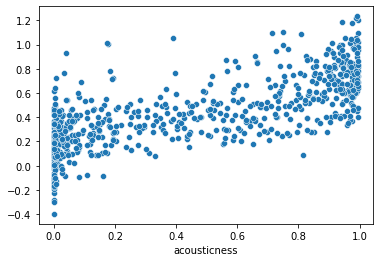

In [47]:
sns.scatterplot(x=y_test, y=sm_pred)

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test, np.clip(sm_pred,0,1))

0.5345523498065297

In [50]:
# Use the variance inflation factor to try and eliminate the multicolinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns).sort_values().to_string())

perc_mean                 1.103227
harm_mean                 1.153842
mfccs_mean4               1.870890
mfccs_mean6               1.939960
mfccs_mean19              2.047206
mfccs_mean17              2.271236
mfccs_mean2               2.305211
mfccs_mean13              2.609718
mfccs_mean8               2.675257
mfccs_mean9               2.689604
mfccs_mean15              2.751034
mfccs_mean11              2.825074
mfccs_mean7               3.056221
mfccs_mean5               3.382847
mfccs_mean10              3.460642
perc_var                  3.699390
mfccs_mean18              3.816895
mfccs_mean12              3.973020
harm_var                  4.164268
mfccs_mean14              4.167191
mfccs_var0                4.509843
mfccs_mean16              4.517874
mfccs_mean3               6.187017
mfccs_var2                6.927123
mfccs_var3                8.304429
mfccs_var1               10.110159
mfccs_mean0              10.142183
mfccs_var4               10.361499
spectral_rolloff_var

In [52]:
def calculate_vif(X, thresh=5.0):
    """ calculate the VIF and remove features above a set threshold
    
    args:
        X:   A dataframe containing all of the independent variables
        thresh: the maximum acceptable VIF value
        
    Returns:
        A list of features with a VIF below the threshold
    
    """
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [53]:
calculate_vif(X_train)

dropping 'chroma_mean1' at index: 8
dropping 'chroma_mean10' at index: 25
dropping 'chroma_mean5' at index: 15
dropping 'chroma_mean8' at index: 20
dropping 'spectral_rolloff_mean' at index: 4
dropping 'chroma_mean3' at index: 10
dropping 'chroma_mean11' at index: 22
dropping 'chroma_mean6' at index: 14
dropping 'spec_cent_mean' at index: 2
dropping 'mfccs_mean1' at index: 27
dropping 'chroma_mean9' at index: 17
dropping 'chroma_mean0' at index: 4
dropping 'chroma_mean7' at index: 13
dropping 'chroma_mean4' at index: 9
dropping 'mfccs_var15' at index: 51
dropping 'mfccs_var18' at index: 56
dropping 'mfccs_var8' at index: 37
dropping 'tempo_y' at index: 1
dropping 'mfccs_var13' at index: 45
dropping 'chroma_mean2' at index: 5
dropping 'mfccs_var10' at index: 38
dropping 'mfccs_var17' at index: 49
dropping 'mfccs_var12' at index: 41
dropping 'mfccs_var6' at index: 31
dropping 'mfccs_var9' at index: 35
dropping 'mfccs_var5' at index: 29
dropping 'mfccs_var14' at index: 40
dropping 'chroma

,spectral_rolloff_var,harm_mean,perc_mean,harm_var,perc_var,mfccs_mean0,mfccs_var0,mfccs_mean2,mfccs_mean3,mfccs_var3,...,mfccs_mean11,mfccs_mean12,mfccs_mean13,mfccs_mean14,mfccs_mean15,mfccs_mean16,mfccs_mean17,mfccs_mean18,mfccs_mean19,mfccs_var19
831,9.352253e+05,0.000002,-2.156936e-05,0.026615,0.005562,-109.017500,2350.15820,-7.598344,28.660202,131.866800,...,1.582389,0.085909,-0.347500,-8.984772,4.663494,-9.228068,-1.839536,0.596844,-5.378034,60.352825
2846,9.095944e+05,-0.000057,2.168247e-04,0.083911,0.011538,-17.515491,1175.28710,-26.457487,38.038906,234.567500,...,-3.302095,-4.491840,-7.296298,0.373562,-3.738594,-3.177873,5.447531,-1.940709,-4.037252,21.158150
2577,1.331431e+05,-0.000039,-1.613026e-04,0.000354,0.000053,-294.200320,796.74615,-32.668118,28.494835,29.220787,...,1.045407,-4.433509,4.305631,1.257077,4.611026,-0.204966,5.670264,-2.016039,1.984067,13.510363
2608,3.301109e+06,-0.000294,-6.885579e-04,0.055718,0.011356,-47.072598,5188.57300,-4.795584,37.726890,192.620210,...,13.215641,3.865599,3.196638,-3.901403,6.138058,-4.454649,2.758329,-1.377494,2.645356,25.445963
111,2.320151e+05,0.000001,-3.233283e-05,0.030950,0.001680,-153.033260,1451.40430,8.922096,18.868383,77.851746,...,1.290604,-1.046264,-1.703219,-8.793567,-8.459345,-6.706284,-11.932549,-14.153864,-5.263285,56.556423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2.191391e+06,-0.000016,9.056532e-05,0.059793,0.020044,19.485120,1987.75680,-35.422970,25.805006,385.939540,...,-2.829476,-13.245867,-6.016253,-5.953458,2.791326,-10.215302,1.048352,1.004100,1.268824,75.557540
1130,1.879107e+06,0.000003,8.616419e-08,0.030020,0.001745,-143.614640,3464.40920,0.136008,20.387005,143.984050,...,-9.233213,-10.023088,-15.272711,-14.698983,-10.543830,-15.744756,-7.624085,-9.512946,-3.600409,29.813200
1294,6.501933e+05,-0.000002,3.412919e-06,0.045829,0.008856,-25.996664,644.12524,-60.631165,43.434036,92.206790,...,12.423775,3.183962,11.537453,-2.852720,1.788148,-0.095108,-1.903539,-0.743595,-1.606025,49.232887
860,6.390169e+06,0.000085,5.832050e-04,0.011815,0.002577,-146.077040,4296.55600,4.595097,29.535175,303.955900,...,-0.061466,-2.238990,3.934788,-3.394696,-1.209924,-4.595907,1.515654,-8.046088,0.418473,30.401379


In [54]:
vif_cols = ['spectral_rolloff_var', 'harm_mean', 'perc_mean', 'harm_var',
       'perc_var', 'mfccs_mean0', 'mfccs_var0', 'mfccs_mean2', 'mfccs_mean3',
       'mfccs_var3', 'mfccs_mean4', 'mfccs_mean5', 'mfccs_mean6',
       'mfccs_mean7', 'mfccs_mean8', 'mfccs_mean9', 'mfccs_mean10',
       'mfccs_mean11', 'mfccs_mean12', 'mfccs_mean13', 'mfccs_mean14',
       'mfccs_mean15', 'mfccs_mean16', 'mfccs_mean17', 'mfccs_mean18',
       'mfccs_mean19', 'mfccs_var19']

In [55]:
X_train_con = sm.add_constant(X_train[vif_cols])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     89.39
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:03:59   Log-Likelihood:                -337.65
No. Observations:                2624   AIC:                             731.3
Df Residuals:                    2596   BIC:                             895.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3792      0.033     11.453      0.000       0.314       0.444
spectral_rolloff_var -2.657e-08   4.29e-09     -6.188      0.000    -3.5e-08   -1.81e-08
harm_mean                0.2630      0.249      1.056      0.291      -0.225       0.751
perc_mean               -0.4170      3.565     -0.117      0.907      -7.408       6.574
harm_var                 0.6486      0.259      2.500      0.012       0.140       1.157
perc_var                -2.3124      0.774     -2.986      0.003      -3.831      -0.794
mfccs_mean0             -0.0010   9.47e-05    -10.858      0.000      -0.001      -0.001
mfccs_var0           -1.777e-06   2.07e-06     -0.858      0.391   -5.84e-06    2.28e-06
mfccs_mean2              0.0006      0.000      1.956      0.051   -1.43e-06       0.001
mfccs_mean3          -8.402e-05      0.000     -0.200      0.841      -0.001       0.001
mfccs_var3           -3.101e-05      4e-05     -0.776      0.438      -0.000    4.74e-05
mfccs_mean4             -0.0022      0.001     -3.533      0.000      -0.003      -0.001
mfccs_mean5             -0.0003      0.001     -0.439      0.660      -0.002       0.001
mfccs_mean6              0.0013      0.001      1.536      0.125      -0.000       0.003
mfccs_mean7             -0.0074      0.001     -7.462      0.000      -0.009      -0.005
mfccs_mean8             -0.0059      0.001     -5.506      0.000      -0.008      -0.004
mfccs_mean9             -0.0068      0.001     -5.739      0.000      -0.009      -0.004
mfccs_mean10            -0.0033      0.001     -2.767      0.006      -0.006      -0.001
mfccs_mean11            -0.0039      0.001     -2.941      0.003      -0.007      -0.001
mfccs_mean12            -0.0017      0.001     -1.234      0.217      -0.005       0.001
mfccs_mean13            -0.0025      0.001     -1.705      0.088      -0.005       0.000
mfccs_mean14             0.0028      0.002      1.814      0.070      -0.000       0.006
mfccs_mean15            -0.0050      0.002     -3.092      0.002      -0.008      -0.002
mfccs_mean16             0.0013      0.002      0.790      0.430      -0.002       0.004
mfccs_mean17             0.0015      0.002      0.897      0.370      -0.002       0.005
mfccs_mean18            -0.0029      0.002     -1.722      0.085      -0.006       0.000
mfccs_mean19             0.0017      0.001      1.145      0.252      -0.001       0.005
mfccs_var19              0.0005      0.000      3.434      0.001       0.000       0.001
==============================================================================
Omnibus:                       20.679   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.362
Skew:                           0.037   Prob(JB):                     0.000761
Kurtosis

In [56]:
# The condition number is still a large for some features

In [57]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    """ Removes features with large p-values
    
    Args:
        X: the dependent variables in a pandas dataframe
        y: the independent variable
        initial_list: a list of initial included features
        threshold_in: the maximum threshold to allow features
        threshold_out: the minumum value for a p-value before exclusion
            from the final list
        verbose (bool): the verbosity of the output
        
    returns:
        A list of features with significant p-values
    
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [58]:
result = stepwise_selection(X_train, y_train)

Add  spectral_rolloff_mean          with p-value 1.16236e-212
Add  mfccs_mean7                    with p-value 3.36481e-116
Add  mfccs_mean8                    with p-value 2.81614e-35
Add  chroma_mean3                   with p-value 6.43418e-19
Add  mfccs_mean9                    with p-value 1.2648e-15
Add  harm_var                       with p-value 1.26927e-09
Add  chroma_mean1                   with p-value 9.93535e-09
Add  chroma_mean4                   with p-value 5.41472e-07
Add  chroma_mean10                  with p-value 6.2702e-08
Drop chroma_mean3                   with p-value 0.0656049
Add  mfccs_mean10                   with p-value 8.58278e-06
Add  mfccs_mean4                    with p-value 1.39646e-05
Add  mfccs_mean0                    with p-value 0.00014804
Add  spec_cent_var                  with p-value 1.06244e-05
Add  mfccs_var7                     with p-value 0.000733195
Drop harm_var                       with p-value 0.0823347
Add  mfccs_var18             

In [59]:
result

['spectral_rolloff_mean',
 'mfccs_mean7',
 'mfccs_mean8',
 'mfccs_mean9',
 'chroma_mean1',
 'chroma_mean4',
 'chroma_mean10',
 'mfccs_mean10',
 'mfccs_mean4',
 'mfccs_mean0',
 'spec_cent_var',
 'mfccs_var7',
 'mfccs_var18',
 'zero_crossings',
 'mfccs_mean2',
 'mfccs_mean1',
 'mfccs_var6']

In [60]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:04:10   Log-Likelihood:                -175.55
No. Observations:                2624   AIC:                             387.1
Df Residuals:                    2606   BIC:                             492.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7334      0.083      8.818      0.000       0.570       0.897
spectral_rolloff_mean -6.827e-05   1.02e-05     -6.661      0.000   -8.84e-05   -4.82e-05
mfccs_mean7              -0.0043      0.001     -4.772      0.000      -0.006      -0.003
mfccs_mean8              -0.0057      0.001     -6.040      0.000      -0.008      -0.004
mfccs_mean9              -0.0049      0.001     -4.590      0.000      -0.007      -0.003
chroma_mean1             -0.2536      0.046     -5.508      0.000      -0.344      -0.163
chroma_mean4             -0.2221      0.039     -5.698      0.000      -0.299      -0.146
chroma_mean10            -0.2250      0.044     -5.102      0.000      -0.311      -0.138
mfccs_mean10             -0.0049      0.001     -4.853      0.000      -0.007      -0.003
mfccs_mean4              -0.0028      0.001     -5.162      0.000      -0.004      -0.002
mfccs_mean0              -0.0004   7.83e-05     -4.841      0.000      -0.001      -0.000
spec_cent_var            -1.7523      0.423     -4.139      0.000      -2.582      -0.922
mfccs_var7               -0.0008      0.000     -4.971      0.000      -0.001      -0.000
mfccs_var18               0.0006      0.000      3.461      0.001       0.000       0.001
zero_crossings         1.733e-06   3.65e-07      4.741      0.000    1.02e-06    2.45e-06
mfccs_mean2               0.0013      0.000      4.456      0.000       0.001       0.002
mfccs_mean1               0.0011      0.000      3.321      0.001       0.000       0.002
mfccs_var6                0.0003      0.000      2.720      0.007    9.73e-05       0.001
==============================================================================
Omnibus:                        2.183   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                2.137
Skew:                          -0.034   Prob(JB):                        0.343
Kurtosis:                       2.878   Cond. No.                     5.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [62]:
r2_score(y_test, step_pred)

0.5207191913105083

In [63]:
r2_score(y_test, np.clip(step_pred,0,1))

0.5332574181736922

<AxesSubplot:xlabel='acousticness'>

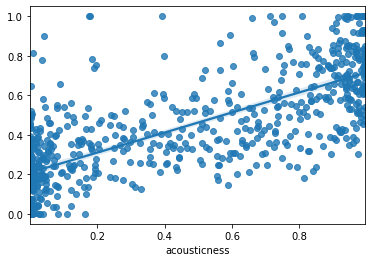

In [66]:
sns.regplot(x=y_test, y=np.clip(step_pred,0,1))

In [65]:
statsmodels.tools.eval_measures.rmse(y_test, step_pred)

0.2668160957430676

### Random forests

In [68]:
# try a random forest regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf = RandomForestRegressor()

In [71]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [72]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],
    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 100, 'max_features': 15, 'n_estimators': 400}

In [73]:
rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=15, n_estimators=400)

In [74]:
rf.best_estimator_.score(X_train, y_train)

0.9382849126697265

In [75]:
rf.best_estimator_.score(X_test, y_test)

0.5351732394093875

In [76]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

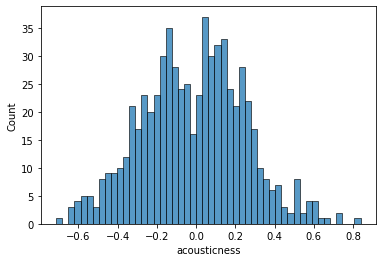

In [77]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='acousticness'>

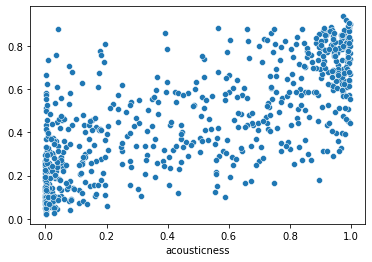

In [78]:
sns.scatterplot(y=y_pred, x=y_test)

In [81]:
# large amounts of overfitting
# We will try a few other models to see if we can bring this down

### Decision Trees

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,15,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [84]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [85]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=5)

In [86]:
tree.best_estimator_.score(X_train, y_train)

0.5760560156968519

In [87]:
tree.best_estimator_.score(X_test, y_test)

0.40605856034367827

In [88]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [89]:
from sklearn.ensemble import ExtraTreesRegressor

In [90]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [91]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [92]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=10,
                    n_estimators=600)

In [164]:
et.best_estimator_.score(X_train, y_train)

0.6835518931421322

In [94]:
et.best_estimator_.score(X_test, y_test)

0.5285489953187165

In [143]:
def adj_r2_score(model, X, y, cols=None):
    """ returns adjusted r2 for statsmodels linear regression and gridsearch
    
    Args:
        model: either an statsmodels linear regression or sklearn gridsearch    
        X: the independent variables
        y: the dependent variable
        cols: the columns used for the regression
        
    Returns:
        the adjusted r2 for the model    
    """
    if cols is not None:
        p = len(cols) + 1
        n = len(X)
    else:
        n, p = X.shape
    if type(model) == statsmodels.regression.linear_model.RegressionResultsWrapper:
        if cols is not None:
            r2 = r2_score(y, results.predict(sm.add_constant(X[cols])))
        else:
            r2 = r2_score(y, results.predict(sm.add_constant(X)))
    elif type(model) == GridSearchCV:
        r2 = model.best_estimator_.score(X, y)
    else:
        return NameError
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [145]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [157]:
acousticness = list(zip(adj_r2_train, adj_r2_test))
acousticness = pd.DataFrame(acousticness, columns=['train_adj_r2', 'test_adj_r2'], index=models)
acousticness

,train_adj_r2,test_adj_r2
Linear Regression,0.538839,0.507197
Decision Trees,0.573127,0.389302
Random Forests,0.937858,0.522059
Extra Trees,0.681365,0.515248


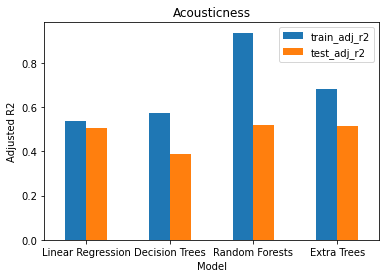

In [163]:
acousticness.plot(kind='bar', xlabel='Model', rot=0, title='Acousticness', ylabel='Adjusted R2')
plt.show()

# Danceability

In [245]:
X = tracks[cols]
y = tracks['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [246]:
result = stepwise_selection(X_train, y_train)

Add  spectral_rolloff_var           with p-value 1.0415e-144
Add  mfccs_var4                     with p-value 3.13821e-27
Add  mfccs_mean5                    with p-value 3.40284e-20
Add  mfccs_mean2                    with p-value 1.97672e-13
Add  mfccs_var0                     with p-value 1.25018e-09
Add  mfccs_mean17                   with p-value 1.14033e-07
Add  chroma_var5                    with p-value 3.62303e-06
Add  mfccs_var2                     with p-value 0.000141405
Add  spectral_rolloff_mean          with p-value 4.89679e-05
Add  zero_crossings                 with p-value 2.97701e-12
Add  harm_var                       with p-value 0.000769597
Add  perc_var                       with p-value 8.04777e-09
Add  chroma_var9                    with p-value 0.000642338
Add  mfccs_var13                    with p-value 0.00413035
Add  mfccs_mean10                   with p-value 0.00600644


In [247]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     95.82
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          2.96e-235
Time:                        20:27:32   Log-Likelihood:                 1185.2
No. Observations:                2624   AIC:                            -2338.
Df Residuals:                    2608   BIC:                            -2244.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3069      0.015     20.004      0.000       0.277       0.337
spectral_rolloff_var   1.661e-08   2.47e-09      6.729      0.000    1.18e-08    2.14e-08
mfccs_var4                0.0002   3.87e-05      5.132      0.000       0.000       0.000
mfccs_mean5               0.0016      0.000      4.612      0.000       0.001       0.002
mfccs_mean2               0.0006      0.000      3.697      0.000       0.000       0.001
mfccs_var0             5.288e-06   1.15e-06      4.589      0.000    3.03e-06    7.55e-06
mfccs_mean17              0.0018      0.001      2.495      0.013       0.000       0.003
chroma_var5               0.3447      0.092      3.752      0.000       0.165       0.525
mfccs_var2             6.233e-05   1.23e-05      5.054      0.000    3.81e-05    8.65e-05
spectral_rolloff_mean  3.102e-05   3.93e-06      7.902      0.000    2.33e-05    3.87e-05
zero_crossings        -1.801e-06   2.22e-07     -8.104      0.000   -2.24e-06   -1.37e-06
harm_var                 -0.8976      0.142     -6.315      0.000      -1.176      -0.619
perc_var                  2.5279      0.428      5.904      0.000       1.688       3.367
chroma_var9               0.2977      0.090      3.322      0.001       0.122       0.473
mfccs_var13               0.0003   9.88e-05      3.169      0.002       0.000       0.001
mfccs_mean10              0.0015      0.001      2.750      0.006       0.000       0.003
==============================================================================
Omnibus:                       13.152   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.163
Skew:                          -0.127   Prob(JB):                      0.00228
Kurtosis:                       2.785   Cond. No.                     4.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [249]:
r2_score(y_test, step_pred)

0.27861411480651443

In [250]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

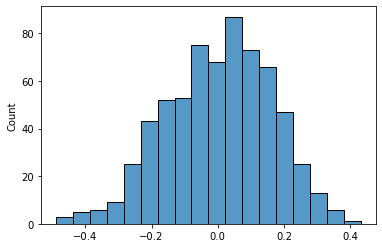

In [251]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='danceability'>

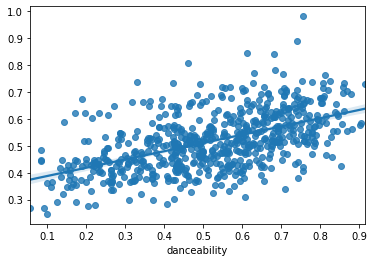

In [252]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [253]:
rf = RandomForestRegressor()

In [254]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 20, 'max_features': 15, 'n_estimators': 400}

In [255]:
rf.best_estimator_

RandomForestRegressor(max_depth=20, max_features=15, n_estimators=400)

In [256]:
rf.best_estimator_.score(X_train, y_train)

0.9184746733826031

In [257]:
rf.best_estimator_.score(X_test, y_test)

0.38859946274676904

In [258]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='danceability', ylabel='Count'>

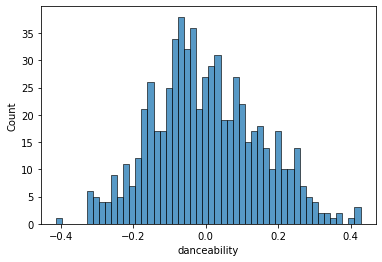

In [259]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='danceability'>

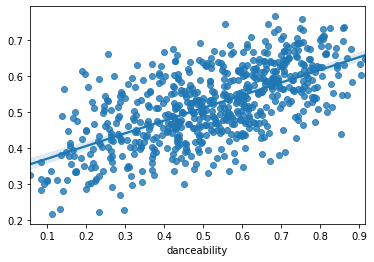

In [260]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [261]:
from sklearn.tree import DecisionTreeRegressor

In [262]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [263]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [264]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=5)

In [265]:
tree.best_estimator_.score(X_train, y_train)

0.33307686852296947

In [266]:
tree.best_estimator_.score(X_test, y_test)

0.27205066709423253

In [267]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [268]:
from sklearn.ensemble import ExtraTreesRegressor

In [269]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [270]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [271]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                    n_estimators=400)

In [272]:
et.best_estimator_.score(X_train, y_train)

0.5656711100165002

In [273]:
et.best_estimator_.score(X_test, y_test)

0.3626434556615604

In [274]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [275]:
et.best_estimator_.score(X_train, y_train)

0.5656711100165002

In [276]:
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]

In [277]:
danceability = list(zip(adj_r2_train, adj_r2_test))
danceability = pd.DataFrame(danceability, columns=['train_adj_r2', 'test_adj_r2'], index=models)
danceability

,train_adj_r2,test_adj_r2
Linear Regression,0.351342,0.260579
Decision Trees,0.328984,0.253852
Random Forests,0.917974,0.373314
Extra Trees,0.563005,0.346710


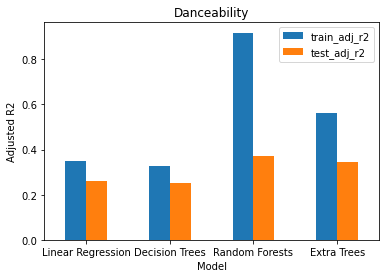

In [278]:
danceability.plot(kind='bar', xlabel='Model', rot=0, title='Danceability', ylabel='Adjusted R2')
plt.show()

# Energy

In [279]:
X = tracks[cols]
y = tracks['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [280]:
result = stepwise_selection(X_train, y_train)

Add  mfccs_mean0                    with p-value 0.0
Add  spectral_rolloff_mean          with p-value 1.18915e-38
Add  chroma_mean10                  with p-value 8.36369e-23
Add  mfccs_var18                    with p-value 7.70257e-13
Add  chroma_mean1                   with p-value 4.83182e-09
Add  mfccs_mean10                   with p-value 5.72805e-06
Add  harm_var                       with p-value 0.000243917
Add  perc_var                       with p-value 4.44119e-06
Add  tempo_y                        with p-value 0.000358659
Add  chroma_mean4                   with p-value 0.000552694
Add  chroma_var8                    with p-value 0.000867837
Add  spec_cent_mean                 with p-value 0.000426375
Add  harm_mean                      with p-value 0.00395806
Add  chroma_var10                   with p-value 0.00544705
Add  mfccs_mean18                   with p-value 0.00655857


In [281]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     242.2
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:34:13   Log-Likelihood:                 795.74
No. Observations:                2624   AIC:                            -1559.
Df Residuals:                    2608   BIC:                            -1466.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4110      0.032     12.681      0.000       0.347       0.475
mfccs_mean0               0.0013   5.47e-05     24.090      0.000       0.001       0.001
spectral_rolloff_mean  2.019e-05   3.55e-06      5.691      0.000    1.32e-05    2.72e-05
chroma_mean10             0.0826      0.037      2.213      0.027       0.009       0.156
mfccs_var18              -0.0006      0.000     -5.552      0.000      -0.001      -0.000
chroma_mean1              0.1307      0.032      4.077      0.000       0.068       0.194
mfccs_mean10              0.0017      0.001      2.698      0.007       0.000       0.003
harm_var                 -0.9917      0.174     -5.714      0.000      -1.332      -0.651
perc_var                  2.3164      0.498      4.649      0.000       1.339       3.293
tempo_y                   0.0004      0.000      3.500      0.000       0.000       0.001
chroma_mean4              0.1135      0.028      4.065      0.000       0.059       0.168
chroma_var8               0.3523      0.124      2.838      0.005       0.109       0.596
spec_cent_mean            0.1469      0.041      3.595      0.000       0.067       0.227
harm_mean                -0.4705      0.156     -3.022      0.003      -0.776      -0.165
chroma_var10              0.4681      0.155      3.026      0.003       0.165       0.772
mfccs_mean18              0.0022      0.001      2.721      0.007       0.001       0.004
==============================================================================
Omnibus:                      126.694   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.141
Skew:                           0.143   Prob(JB):                     1.75e-88
Kurtosis:                       4.901   Cond. No.                     5.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [283]:
r2_score(y_test, step_pred)

0.5700815117591415

In [284]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

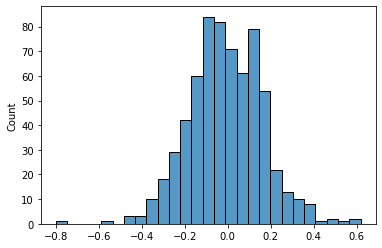

In [285]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='energy'>

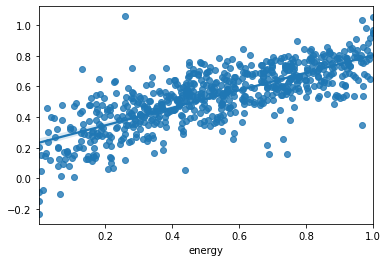

In [286]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [287]:
rf = RandomForestRegressor()

In [288]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 20, 'max_features': 15, 'n_estimators': 300}

In [289]:
rf.best_estimator_

RandomForestRegressor(max_depth=20, max_features=15, n_estimators=300)

In [290]:
rf.best_estimator_.score(X_train, y_train)

0.948443009723096

In [291]:
rf.best_estimator_.score(X_test, y_test)

0.6352289263017564

In [292]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='energy', ylabel='Count'>

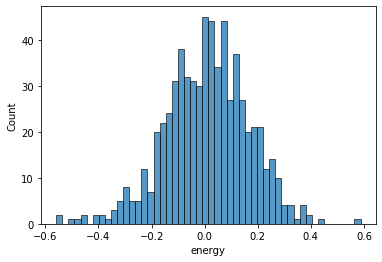

In [293]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='energy'>

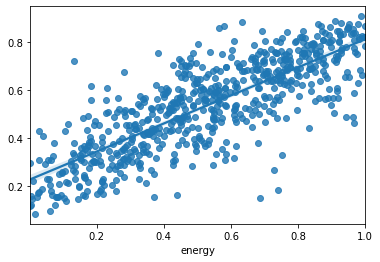

In [294]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [295]:
from sklearn.tree import DecisionTreeRegressor

In [296]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [297]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [298]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [299]:
tree.best_estimator_.score(X_train, y_train)

0.6369140845881844

In [300]:
tree.best_estimator_.score(X_test, y_test)

0.5396111269663546

In [301]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [302]:
from sklearn.ensemble import ExtraTreesRegressor

In [303]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [304]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [305]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                    n_estimators=600)

In [306]:
et.best_estimator_.score(X_train, y_train)

0.7174197596915605

In [307]:
et.best_estimator_.score(X_test, y_test)

0.6200534050018146

In [310]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [311]:
energy = list(zip(adj_r2_train, adj_r2_test))
energy = pd.DataFrame(energy, columns=['train_adj_r2', 'test_adj_r2'], index=models)
energy

,train_adj_r2,test_adj_r2
Linear Regression,0.579591,0.559334
Decision Trees,0.634686,0.528101
Random Forests,0.948127,0.626110
Extra Trees,0.715685,0.610555


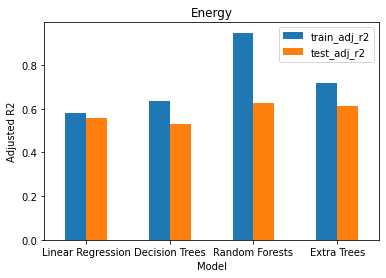

In [312]:
energy.plot(kind='bar', xlabel='Model', rot=0, title='Energy', ylabel='Adjusted R2')
plt.show()

In [117]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
pred_train = lreg.predict(X_train)

In [118]:
mean_squared_error(y_train, pred_train)**0.5

0.17558172407229886

In [119]:
lreg.score(X_train, y_train)

0.5964931861531625

In [120]:
lreg.score(X_test, y_test)

0.5800992828922455

In [121]:
lr_pred = lreg.predict(X_test)

In [133]:
mean_squared_error(y_test, lr_pred)**0.5

0.16935546681391075

<AxesSubplot:xlabel='energy', ylabel='Count'>

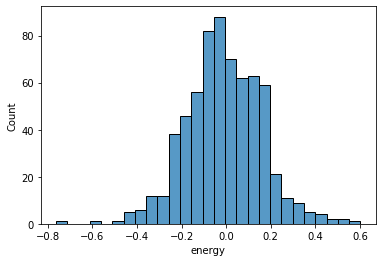

In [122]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='energy'>

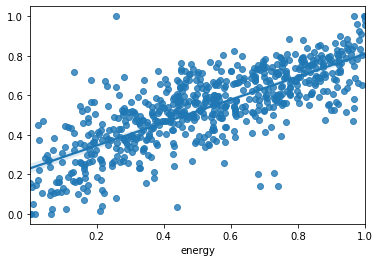

In [132]:
sns.regplot(x=y_test, y=np.clip(lr_pred,0,1))

In [124]:
rf = RandomForestRegressor()

In [125]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [50, 100, 200],
    'max_features' : [20, 30, 40],
    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 200, 'max_features': 30, 'n_estimators': 400}

In [126]:
rf.best_estimator_

RandomForestRegressor(max_depth=200, max_features=30, n_estimators=400)

In [127]:
rf.best_estimator_.score(X_train, y_train)

0.9477326898049577

In [128]:
rf.best_estimator_.score(X_test, y_test)

0.6388580343259539

In [129]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='energy', ylabel='Count'>

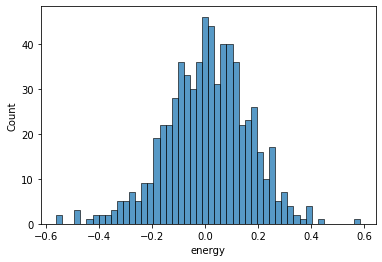

In [130]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='energy'>

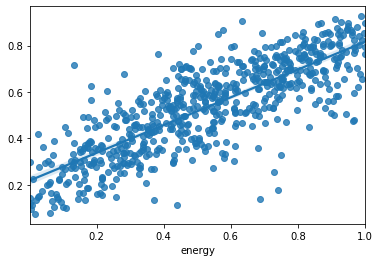

In [131]:
sns.regplot(y=y_pred, x=y_test)

# Instrumentalness

In [313]:
X = tracks[cols]
y = tracks['instrumentalness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [314]:
result = stepwise_selection(X_train, y_train)

Add  spectral_rolloff_mean          with p-value 4.02851e-56
Add  spec_cent_mean                 with p-value 1.647e-77
Add  mfccs_mean5                    with p-value 1.68238e-26
Add  chroma_var6                    with p-value 1.15951e-16
Add  mfccs_var6                     with p-value 1.33314e-13
Add  mfccs_mean0                    with p-value 1.61024e-12
Add  chroma_mean6                   with p-value 1.77488e-10
Add  spec_cent_var                  with p-value 1.4057e-07
Add  spectral_rolloff_var           with p-value 0.000297367
Add  mfccs_mean16                   with p-value 0.000206349
Add  mfccs_mean9                    with p-value 0.00212808
Add  mfccs_mean12                   with p-value 0.000617517
Add  chroma_var1                    with p-value 0.00593855
Add  chroma_mean1                   with p-value 0.00071773
Add  mfccs_mean4                    with p-value 0.0066365
Add  mfccs_mean8                    with p-value 0.0037398
Add  mfccs_mean13                 

In [315]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       instrumentalness   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     74.92
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          2.60e-210
Time:                        20:51:11   Log-Likelihood:                -826.00
No. Observations:                2624   AIC:                             1688.
Df Residuals:                    2606   BIC:                             1794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5693      0.045     12.539      0.000       0.480       0.658
spectral_rolloff_mean -9.594e-05   7.08e-06    -13.543      0.000      -0.000    -8.2e-05
spec_cent_mean            0.8009      0.100      8.008      0.000       0.605       0.997
mfccs_mean5               0.0058      0.001      7.336      0.000       0.004       0.007
chroma_var6              -1.6892      0.293     -5.758      0.000      -2.264      -1.114
mfccs_var6               -0.0009      0.000     -7.507      0.000      -0.001      -0.001
mfccs_mean0              -0.0006   9.07e-05     -6.268      0.000      -0.001      -0.000
chroma_mean6              0.2710      0.072      3.742      0.000       0.129       0.413
spec_cent_var             4.2539      0.748      5.685      0.000       2.787       5.721
spectral_rolloff_var  -1.465e-08   5.72e-09     -2.562      0.010   -2.59e-08   -3.44e-09
mfccs_mean16              0.0060      0.002      3.685      0.000       0.003       0.009
mfccs_mean9              -0.0054      0.001     -4.165      0.000      -0.008      -0.003
mfccs_mean12              0.0052      0.002      3.382      0.001       0.002       0.008
chroma_var1              -1.2936      0.301     -4.291      0.000      -1.885      -0.702
chroma_mean1              0.2620      0.074      3.534      0.000       0.117       0.407
mfccs_mean4              -0.0023      0.001     -3.347      0.001      -0.004      -0.001
mfccs_mean8               0.0036      0.001      3.002      0.003       0.001       0.006
mfccs_mean13             -0.0045      0.002     -2.765      0.006      -0.008      -0.001
==============================================================================
Omnibus:                      166.356   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.592
Skew:                          -0.036   Prob(JB):                     6.96e-14
Kurtosis:                       2.259   Cond. No.                     3.24e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [316]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [317]:
r2_score(y_test, step_pred)

0.3030370297316738

In [318]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

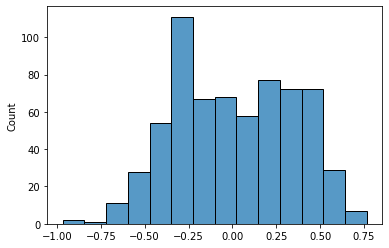

In [319]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='instrumentalness'>

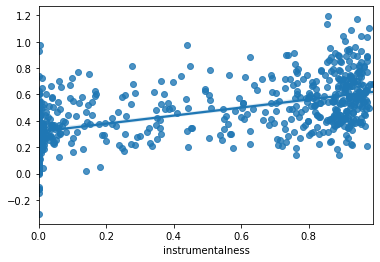

In [320]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [321]:
rf = RandomForestRegressor()

In [322]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 20, 'max_features': 15, 'n_estimators': 400}

In [323]:
rf.best_estimator_

RandomForestRegressor(max_depth=20, max_features=15, n_estimators=400)

In [324]:
rf.best_estimator_.score(X_train, y_train)

0.9133452196080314

In [325]:
rf.best_estimator_.score(X_test, y_test)

0.36948625286083003

In [326]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

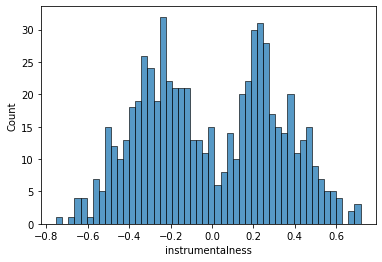

In [327]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='instrumentalness'>

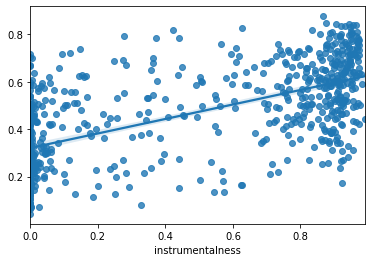

In [328]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [329]:
from sklearn.tree import DecisionTreeRegressor

In [330]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [331]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [332]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=14, min_samples_split=5)

In [333]:
tree.best_estimator_.score(X_train, y_train)

0.2499401865245129

In [334]:
tree.best_estimator_.score(X_test, y_test)

0.1710062808991224

In [335]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [336]:
from sklearn.ensemble import ExtraTreesRegressor

In [337]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [338]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [339]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                    n_estimators=600)

In [340]:
et.best_estimator_.score(X_train, y_train)

0.5308599499382165

In [341]:
et.best_estimator_.score(X_test, y_test)

0.3318515581497068

In [342]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [343]:
instrumentalness = list(zip(adj_r2_train, adj_r2_test))
instrumentalness = pd.DataFrame(instrumentalness, columns=['train_adj_r2', 'test_adj_r2'], index=models)
instrumentalness

,train_adj_r2,test_adj_r2
Linear Regression,0.323655,0.283373
Decision Trees,0.244757,0.147618
Random Forests,0.912746,0.351697
Extra Trees,0.527618,0.313001


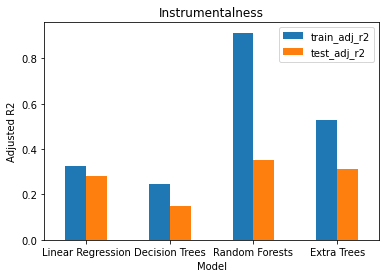

In [345]:
instrumentalness.plot(kind='bar', xlabel='Model', rot=0, title='Instrumentalness', ylabel='Adjusted R2')
plt.show()

In [135]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
pred_train = lreg.predict(X_train)

In [136]:
mean_squared_error(y_train, pred_train)**0.5

0.32527449231056493

In [137]:
lreg.score(X_train, y_train)

0.3532558777255673

In [138]:
lreg.score(X_test, y_test)

0.323929907328646

In [139]:
lr_pred = lreg.predict(X_test)

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

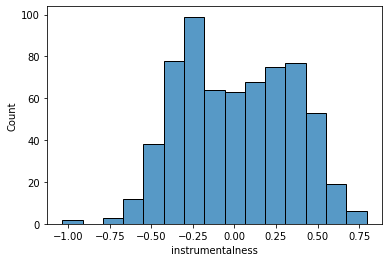

In [140]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='instrumentalness'>

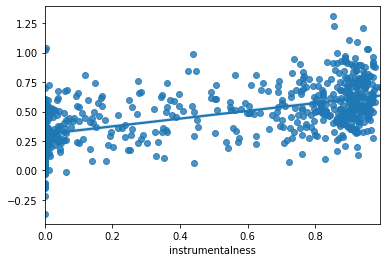

In [141]:
sns.regplot(x=y_test, y=lr_pred)

In [151]:
rf = RandomForestRegressor()

In [152]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [100, 200, 300],
    'max_features' : [40, 50 , 60],
    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 100, 'max_features': 40, 'n_estimators': 300}

In [153]:
rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=40, n_estimators=300)

In [154]:
rf.best_estimator_.score(X_train, y_train)

0.9166582869307238

In [155]:
rf.best_estimator_.score(X_test, y_test)

0.36966471254955424

In [156]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

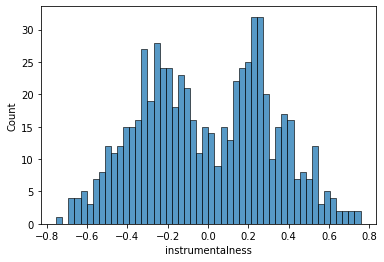

In [157]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='instrumentalness'>

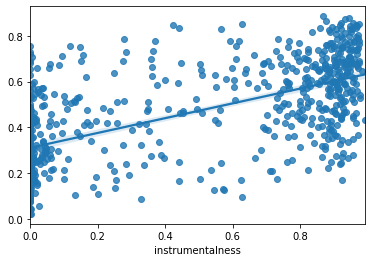

In [158]:
sns.regplot(y=y_pred, x=y_test)

In [303]:
import tensorflow as tf

In [305]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# liveness

In [347]:
X = tracks[cols]
y = tracks['liveness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [348]:
result = stepwise_selection(X_train, y_train)

Add  mfccs_mean0                    with p-value 6.16118e-24
Add  zero_crossings                 with p-value 4.79113e-08
Add  mfccs_mean2                    with p-value 3.14829e-05
Add  mfccs_mean5                    with p-value 0.00255778


In [349]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     40.69
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           4.00e-33
Time:                        21:09:11   Log-Likelihood:                 1187.2
No. Observations:                2624   AIC:                            -2364.
Df Residuals:                    2619   BIC:                            -2335.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1650      0.011     14.809      0.000       0.143       0.187
mfccs_mean0        0.0001    3.4e-05      4.330      0.000    8.05e-05       0.000
zero_crossings  5.925e-07   1.34e-07      4.409      0.000    3.29e-07    8.56e-07
mfccs_mean2       -0.0007      0.000     -4.911      0.000      -0.001      -0.000
mfccs_mean5        0.0010      0.000      3.019      0.003       0.000       0.002
==============================================================================
Omnibus:                     1269.003   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6657.340
Skew:                           2.323   Prob(JB):                         0.00
Kurtosis:                       9.270   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [351]:
r2_score(y_test, step_pred)

0.050571672547315205

In [352]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

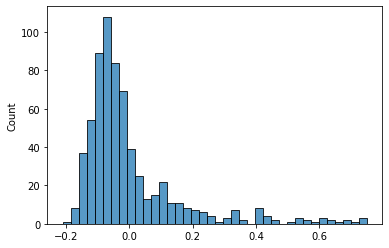

In [353]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='liveness'>

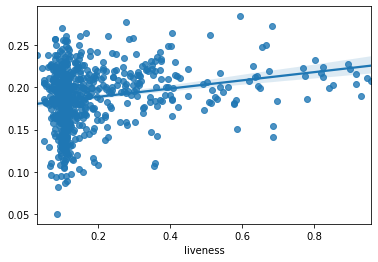

In [354]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [355]:
rf = RandomForestRegressor()

In [356]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 4, 'max_features': 15, 'n_estimators': 400}

In [357]:
rf.best_estimator_

RandomForestRegressor(max_depth=4, max_features=15, n_estimators=400)

In [358]:
rf.best_estimator_.score(X_train, y_train)

0.1523621471241462

In [359]:
rf.best_estimator_.score(X_test, y_test)

0.05383519378604429

In [360]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='liveness', ylabel='Count'>

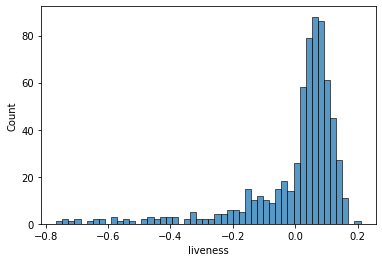

In [361]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='liveness'>

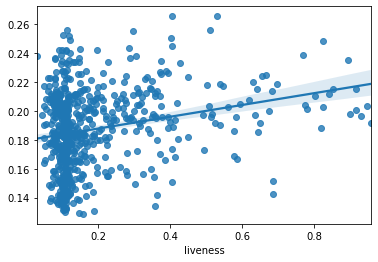

In [362]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [363]:
from sklearn.tree import DecisionTreeRegressor

In [364]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [365]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [366]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [367]:
tree.best_estimator_.score(X_train, y_train)

0.07074863494740113

In [368]:
tree.best_estimator_.score(X_test, y_test)

0.04055546512623498

In [369]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [370]:
from sklearn.ensemble import ExtraTreesRegressor

In [371]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [372]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [373]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=10,
                    n_estimators=500)

In [374]:
et.best_estimator_.score(X_train, y_train)

0.2805944293393857

In [375]:
et.best_estimator_.score(X_test, y_test)

0.07115550110952651

In [380]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [381]:
liveness = list(zip(adj_r2_train, adj_r2_test))
liveness = pd.DataFrame(liveness, columns=['train_adj_r2', 'test_adj_r2'], index=models)
liveness

,train_adj_r2,test_adj_r2
Linear Regression,0.056711,0.043280
Decision Trees,0.068974,0.033186
Random Forests,0.150743,0.046568
Extra Trees,0.279220,0.064022


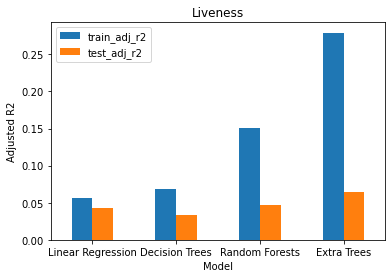

In [382]:
energy.plot(kind='bar', xlabel='Model', rot=0, title='Liveness', ylabel='Adjusted R2')
plt.show()

# Speechiness

In [383]:
X = tracks[cols]
y = tracks['speechiness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [384]:
result = stepwise_selection(X_train, y_train)

Add  perc_var                       with p-value 9.96921e-63
Add  mfccs_var4                     with p-value 7.96889e-48
Add  harm_var                       with p-value 1.54222e-13
Add  chroma_mean10                  with p-value 4.56727e-12
Add  mfccs_var1                     with p-value 7.5469e-06
Add  spec_cent_mean                 with p-value 1.026e-06
Add  chroma_mean8                   with p-value 0.000405908
Add  mfccs_mean6                    with p-value 0.000622243


In [385]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            speechiness   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     93.80
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          2.33e-137
Time:                        21:16:34   Log-Likelihood:                 2609.8
No. Observations:                2624   AIC:                            -5202.
Df Residuals:                    2615   BIC:                            -5149.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0415      0.008     -5.123      0.000      -0.057      -0.026
perc_var           3.3393      0.237     14.066      0.000       2.874       3.805
mfccs_var4         0.0002   1.89e-05     10.869      0.000       0.000       0.000
harm_var          -0.5510      0.079     -6.950      0.000      -0.707      -0.396
chroma_mean10      0.0608      0.015      4.034      0.000       0.031       0.090
mfccs_var1      1.564e-05   2.98e-06      5.252      0.000     9.8e-06    2.15e-05
spec_cent_mean     0.0735      0.019      3.962      0.000       0.037       0.110
chroma_mean8       0.0612      0.015      4.061      0.000       0.032       0.091
mfccs_mean6       -0.0008      0.000     -3.426      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     1946.975   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40558.901
Skew:                           3.341   Prob(JB):                         0.00
Kurtosis:                      21.064   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [386]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [387]:
r2_score(y_test, step_pred)

0.18714093451854852

In [388]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

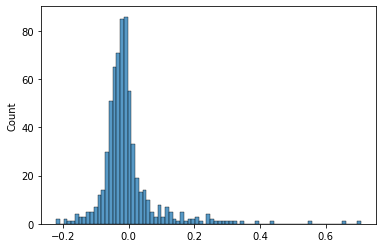

In [389]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='speechiness'>

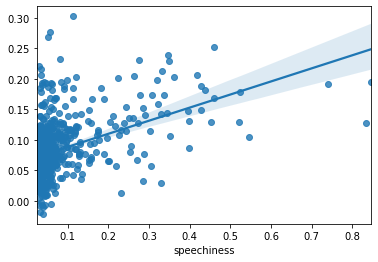

In [390]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [391]:
rf = RandomForestRegressor()

In [392]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 100, 'max_features': 5, 'n_estimators': 200}

In [393]:
rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=5, n_estimators=200)

In [394]:
rf.best_estimator_.score(X_train, y_train)

0.8975714541413945

In [395]:
rf.best_estimator_.score(X_test, y_test)

0.24920561666936691

In [396]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

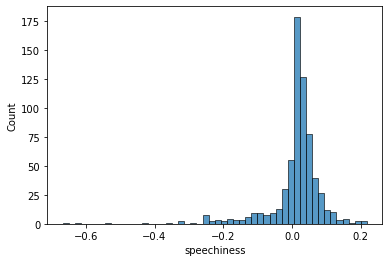

In [397]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='speechiness'>

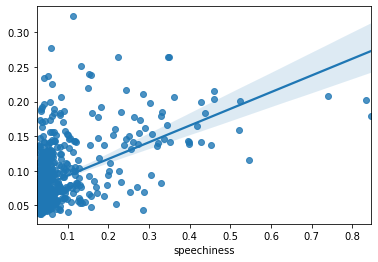

In [398]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [399]:
from sklearn.tree import DecisionTreeRegressor

In [400]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [401]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [402]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=14, min_samples_split=5)

In [403]:
tree.best_estimator_.score(X_train, y_train)

0.22204555904339285

In [404]:
tree.best_estimator_.score(X_test, y_test)

0.09374015344988962

In [405]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [406]:
from sklearn.ensemble import ExtraTreesRegressor

In [407]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [408]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [409]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=20,
                    n_estimators=200)

In [410]:
et.best_estimator_.score(X_train, y_train)

0.45290131805708533

In [411]:
et.best_estimator_.score(X_test, y_test)

0.25641540288035847

In [412]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [413]:
speechiness = list(zip(adj_r2_train, adj_r2_test))
speechiness = pd.DataFrame(speechiness, columns=['train_adj_r2', 'test_adj_r2'], index=models)
speechiness

,train_adj_r2,test_adj_r2
Linear Regression,0.220298,0.175834
Decision Trees,0.219367,0.081134
Random Forests,0.897219,0.238762
Extra Trees,0.451018,0.246072


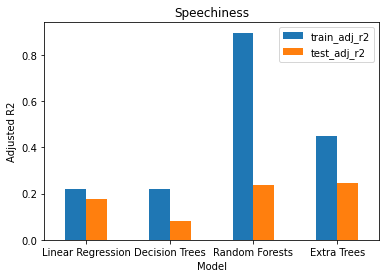

In [447]:
speechiness.plot(kind='bar', xlabel='Model', rot=0, title='Speechiness', ylabel='Adjusted R2')
plt.show()

# Valence

In [415]:
X = tracks[cols]
y = tracks['valence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [416]:
result = stepwise_selection(X_train, y_train)

Add  spectral_rolloff_mean          with p-value 2.36196e-56
Add  mfccs_var4                     with p-value 4.19136e-16
Add  chroma_var3                    with p-value 5.48567e-11
Add  chroma_var9                    with p-value 4.0832e-13
Add  mfccs_mean0                    with p-value 5.19488e-11
Add  harm_var                       with p-value 1.82178e-09
Add  chroma_var5                    with p-value 4.75731e-07
Add  chroma_var11                   with p-value 1.1354e-08
Add  chroma_var7                    with p-value 8.72075e-06
Add  mfccs_mean5                    with p-value 7.89205e-05
Add  chroma_var8                    with p-value 0.000198873
Add  chroma_var4                    with p-value 0.000250246
Add  chroma_var2                    with p-value 0.000533866
Add  chroma_var10                   with p-value 0.000640479
Add  mfccs_mean6                    with p-value 0.00762593
Add  perc_var                       with p-value 0.00663259
Add  zero_crossings         

In [417]:
X_train_con = sm.add_constant(X_train[result])
lin_reg = sm.OLS(y_train, X_train_con)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     41.97
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          1.29e-129
Time:                        21:23:35   Log-Likelihood:                -20.705
No. Observations:                2624   AIC:                             79.41
Df Residuals:                    2605   BIC:                             191.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0593      0.042     -1.406      0.160      -0.142       0.023
spectral_rolloff_mean  2.876e-05   5.98e-06      4.813      0.000     1.7e-05    4.05e-05
mfccs_var4                0.0002   5.13e-05      4.344      0.000       0.000       0.000
chroma_var3               0.7197      0.192      3.743      0.000       0.343       1.097
chroma_var9               0.5209      0.162      3.218      0.001       0.204       0.838
mfccs_mean0               0.0006   7.54e-05      8.594      0.000       0.001       0.001
harm_var                 -1.7171      0.244     -7.050      0.000      -2.195      -1.240
chroma_var5               0.6119      0.158      3.874      0.000       0.302       0.922
chroma_var11              0.5613      0.168      3.346      0.001       0.232       0.890
chroma_var7               0.5062      0.150      3.373      0.001       0.212       0.800
mfccs_mean5               0.0023      0.001      4.088      0.000       0.001       0.003
chroma_var8               0.7895      0.187      4.229      0.000       0.423       1.156
chroma_var4               0.7200      0.168      4.292      0.000       0.391       1.049
chroma_var2               0.5633      0.157      3.585      0.000       0.255       0.871
chroma_var10              0.6111      0.184      3.318      0.001       0.250       0.972
mfccs_mean6              -0.0020      0.001     -3.069      0.002      -0.003      -0.001
perc_var                  2.2669      0.683      3.320      0.001       0.928       3.606
zero_crossings        -9.462e-07   3.06e-07     -3.089      0.002   -1.55e-06   -3.46e-07
tempo_y                   0.0005      0.000      2.802      0.005       0.000       0.001
==============================================================================
Omnibus:                      103.921   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.502
Skew:                           0.403   Prob(JB):                     4.97e-21
Kurtosis:                       2.548   Cond. No.                     8.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [418]:
step_pred = results.predict(sm.add_constant(X_test[result]))

In [419]:
r2_score(y_test, step_pred)

0.2088819420837561

In [420]:
lr_pred = results.predict(sm.add_constant(X_test[result]))

<AxesSubplot:ylabel='Count'>

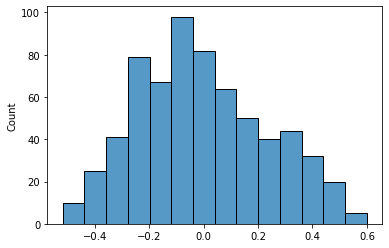

In [421]:
sns.histplot(y_test-lr_pred)

<AxesSubplot:xlabel='valence'>

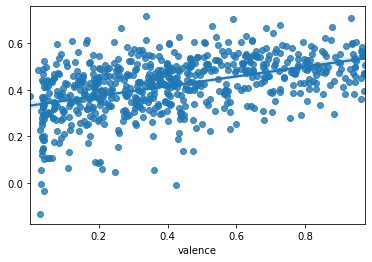

In [422]:
sns.regplot(x=y_test, y=lr_pred)

### Random Forests

In [423]:
rf = RandomForestRegressor()

In [424]:
rf_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [2,3,4,20, 100],
    'max_features' : [5, 10, 15],    
}

rf = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=3, n_jobs=-2)

rf.fit(X_train, y_train)

rf.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


{'max_depth': 100, 'max_features': 15, 'n_estimators': 300}

In [425]:
rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=15, n_estimators=300)

In [426]:
rf.best_estimator_.score(X_train, y_train)

0.9033806043090745

In [427]:
rf.best_estimator_.score(X_test, y_test)

0.27423190532474195

In [428]:
y_pred = rf.best_estimator_.predict(X_test)

<AxesSubplot:xlabel='valence', ylabel='Count'>

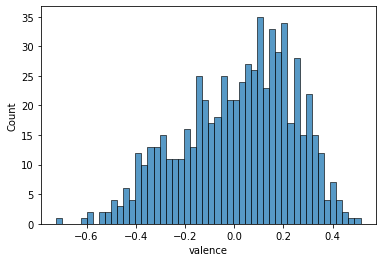

In [429]:
sns.histplot(x=y_pred-y_test, bins=50)

<AxesSubplot:xlabel='valence'>

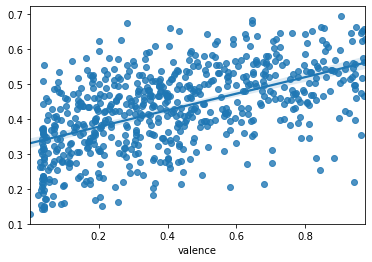

In [430]:
sns.regplot(y=y_pred, x=y_test)

### Decision Trees

In [431]:
from sklearn.tree import DecisionTreeRegressor

In [432]:
tree = GridSearchCV(estimator = DecisionTreeRegressor(),
                    param_grid = {'max_depth': np.arange(3,14,2),
                                  'min_samples_split': [5, 10, 15, 20],
                                  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [433]:
tree.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=3)

In [434]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=5)

In [435]:
tree.best_estimator_.score(X_train, y_train)

0.2126901208042613

In [436]:
tree.best_estimator_.score(X_test, y_test)

0.15297187639542908

In [437]:
# Still a large amount of overfitting and the r2 is less than linear regression

### Extra Trees

In [438]:
from sklearn.ensemble import ExtraTreesRegressor

In [439]:
et = GridSearchCV(estimator = ExtraTreesRegressor(),
                    param_grid = {'max_depth': np.arange(3,8,2),
                                  'n_estimators': [200, 400, 500, 600],
                                  'min_samples_split': [10, 20],
                                  'min_samples_leaf': [4, 6, 10, 14]},
                    cv = 5,
                    refit = True,
                    verbose = 3,
                    n_jobs=-2,
                    scoring='r2')

In [440]:
et.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-2,
             param_grid={'max_depth': array([3, 5, 7]),
                         'min_samples_leaf': [4, 6, 10, 14],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 400, 500, 600]},
             scoring='r2', verbose=3)

In [441]:
et.best_estimator_

ExtraTreesRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                    n_estimators=200)

In [442]:
et.best_estimator_.score(X_train, y_train)

0.42988370025698497

In [443]:
et.best_estimator_.score(X_test, y_test)

0.24810548235810737

In [444]:
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Extra Trees']
models_list = [results, tree, rf, et]
adj_r2_train = [adj_r2_score(model, X_train, y_train, result) for model in models_list]
adj_r2_test = [adj_r2_score(model, X_test, y_test, result) for model in models_list]

In [445]:
valence = list(zip(adj_r2_train, adj_r2_test))
valence = pd.DataFrame(valence, columns=['train_adj_r2', 'test_adj_r2'], index=models)
valence

,train_adj_r2,test_adj_r2
Linear Regression,0.219142,0.185285
Decision Trees,0.206946,0.127707
Random Forests,0.902676,0.252584
Extra Trees,0.425724,0.225678


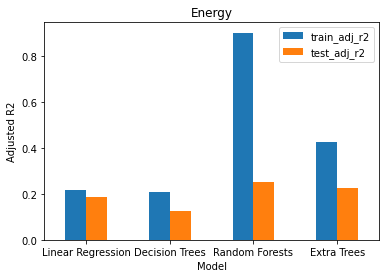

In [446]:
valence.plot(kind='bar', xlabel='Model', rot=0, title='Energy', ylabel='Adjusted R2')
plt.show()